# Capstone project - HealthCare Fraud Detection : Random Forest Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,\
StratifiedKFold, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_roc_curve,roc_auc_score,f1_score
from sklearn.metrics import classification_report as cl_rep_skl
from yellowbrick.classifier import confusion_matrix, classification_report, ROCAUC
from yellowbrick.model_selection import CVScores
from cp_clean_helper import show_values
from LGR_helper import std_num_cols, rb_scale_cols, model_results, get_confusion_matrix
from sklearn import tree
import graphviz as gv
from IPython.display import display
from IPython.display import SVG
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### # Loading datasets, and looking at shapes:-

In [2]:
# Loading train-test 70:30 split (SMOTE and BorderlineSMOTE) datasets
# For these same columns have been drooped as done for the LGR model

trainX_SM = pd.read_csv("trainX_SM.csv",index_col=0)
trainY_SM = pd.read_csv("trainY_SM.csv",index_col=0)
testX_SM = pd.read_csv("testX_SM.csv",index_col=0)
testY_SM = pd.read_csv("testY_SM.csv",index_col=0)

trainX_BSM = pd.read_csv("trainX_BSM.csv",index_col=0)
trainY_BSM = pd.read_csv("trainY_BSM.csv",index_col=0)
testX_BSM = pd.read_csv("testX_BSM.csv",index_col=0)
testY_BSM = pd.read_csv("testY_BSM.csv",index_col=0)

# Looking at dataset shapes

print('\n')
print('Shape of SMOTE balanced trainX data :',trainX_SM.shape)
print('Shape of SMOTE balanced trainY data :',trainY_SM.shape)
print('Shape of SMOTE balanced testX data :',testX_SM.shape)
print('Shape of SMOTE balanced testY data :',testY_SM.shape)
print('Shape of Borderline SMOTE balanced trainX data :',trainX_BSM.shape)
print('Shape of Borderline SMOTE balanced trainY data :',trainY_BSM.shape)
print('Shape of Borderline SMOTE balanced testX data :',testX_BSM.shape)
print('Shape of Borderline SMOTE balanced testY data :',testY_BSM.shape, end='\n')
print('\n')
print("*"*60)

# Looking at class ratios

print('\n')
print('Class ratio - Fraud/Non-Fraud (trainY_SM) :',trainY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_SM) :',testY_SM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (trainY_BSM) :',trainY_BSM.value_counts(normalize=True)*100)
print('Class ratio - Fraud/Non-Fraud (testY_BSM) :',testY_BSM.value_counts(normalize=True)*100, end='\n')
print('\n')
print("*"*60)



Shape of SMOTE balanced trainX data : (483580, 44)
Shape of SMOTE balanced trainY data : (483580, 1)
Shape of SMOTE balanced testX data : (207250, 44)
Shape of SMOTE balanced testY data : (207250, 1)
Shape of Borderline SMOTE balanced trainX data : (483580, 44)
Shape of Borderline SMOTE balanced trainY data : (483580, 1)
Shape of Borderline SMOTE balanced testX data : (207250, 44)
Shape of Borderline SMOTE balanced testY data : (207250, 1)


************************************************************


Class ratio - Fraud/Non-Fraud (trainY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_SM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (trainY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64
Class ratio - Fraud/Non-Fraud (testY_BSM) : PotentialFraud
0                 50.0
1                 50.0
dtype: float64


*******

### # Standardizing the train/test features for balanced datasets:

In [3]:
# SMOTE balanced dataset

# std_num_cols(trainX_SM)
# std_num_cols(testX_SM)

# BorderlineSMOTE balanced dataset

# std_num_cols(trainX_BSM)
# std_num_cols(testX_BSM)

### Baseline Random Forest Model - Standardized

In [4]:
# SMOTE Balanced

# rf_std = RandomForestClassifier(random_state=0, oob_score=True)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rf_std, show = True)

# Out of bag error:

# rf_std.oob_score_

In [5]:
# BorderlineSMOTE Balanced

# rf_std = RandomForestClassifier(random_state=0, oob_score=True)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rf_std, show = True)

# Out of bag error:

# rf_std.oob_score_

### # Robust Scaling the train/test features for  balanced datasets:

In [6]:
# SMOTE balanced dataset

rb_scale_cols(trainX_SM)
rb_scale_cols(testX_SM)

# BorderlineSMOTE balanced dataset

rb_scale_cols(trainX_BSM)
rb_scale_cols(testX_BSM)

### Baseline Random Forest Model - Robust Scaled

In [7]:
# SMOTE Balanced

# rf_rb = RandomForestClassifier(random_state=0, oob_score=True)
# model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rf_rb,show = True)

# Out of bag error:

# rf_rb.oob_score_

In [8]:
# BorderlineSMOTE Balanced

# rf_rb = RandomForestClassifier(random_state=0, oob_score=True)
# model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rf_rb, show = True)

In [9]:
# Out of bag error:

# rf_rb.oob_score_

- Scaling and different upsampling types does not make much difference, so we will go with datasets with BorderlineSmote upsampling and preprocessed using robust scaler as the first base model.

In [10]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

# plt.figure(figsize = (10,10))
# confusion_matrix(
#     rf_rb,
#     trainX_BSM, trainY_BSM, testX_BSM, testY_BSM,
#     classes=['Non-Fraud', 'Possibly-Fraud'])

In [11]:
# Visualizing the AUC/ROC curve with Yellowbricks

# plt.figure(figsize = (14,12))
# sns.set_style("whitegrid")

# visualizer = ROCAUC(rf_rb, classes=['Non-Fraud', 'Possibly-Fraud'])

# visualizer.fit(trainX_BSM, trainY_BSM)        # Fit the training data to the visualizer
# visualizer.score(testX_BSM, testY_BSM)        # Evaluate the model on the test data
# visualizer.show()                           # Finalize and render the figure

In [12]:
# Visualizing the classification report with Yellowbricks

# plt.figure(figsize = (12,6))
# sns.set_style("whitegrid")

# visualizer = classification_report(
#     rf_rb,
#     trainX_SM, trainY_SM, testX_SM, testY_SM,
#     classes=['Non-Fraud', 'Possibly-Fraud'],
#     cmap='YlGnBu',
#     support=True)

### # Plotting scores for different number of trees in the random forest (BSM):

In [13]:
# trees_range = range(80, 180, 20)
# train_error = []
# test_error = []
# oob_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for n_trees in trees_range:
#     rf = RandomForestClassifier(random_state=0, oob_score=True)
#     rf.set_params(n_estimators=n_trees)
#     rf.fit(trainX_BSM, trainY_BSM)
#     train_error.append(1 - rf.score(trainX_BSM, trainY_BSM))
#     test_error.append(1 - rf.score(testX_BSM, testY_BSM))
#     oob_error.append(1 - rf.oob_score_)  
#     train_AUC.append(roc_auc_score(trainY_BSM, rf.predict(trainX_BSM)))
#     test_AUC.append(roc_auc_score(testY_BSM, rf.predict(testX_BSM)))
#     train_F1.append(f1_score(trainY_BSM, rf.predict(trainX_BSM)))
#     test_F1.append(f1_score(testY_BSM, rf.predict(testX_BSM)))

In [14]:
# plt.plot(trees_range, train_error, c='red', label='Training Error')
# plt.plot(trees_range, test_error, c='blue', label='Test Error')
# plt.plot(trees_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [15]:
# plt.plot(trees_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(trees_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [16]:
# plt.plot(trees_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(trees_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

### # Plotting scores for different number of trees in the random forest (SM):

In [17]:
# trees_range = range(80, 180, 10)
# train_error = []
# test_error = []
# oob_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for n_trees in trees_range:
#     rf = RandomForestClassifier(random_state=0, oob_score=True)
#     rf.set_params(n_estimators=n_trees)
#     rf.fit(trainX_SM, trainY_SM)
#     train_error.append(1 - rf.score(trainX_SM, trainY_SM))
#     test_error.append(1 - rf.score(testX_SM, testY_SM))
#     oob_error.append(1 - rf.oob_score_)  
#     train_AUC.append(roc_auc_score(trainY_SM, rf.predict(trainX_SM)))
#     test_AUC.append(roc_auc_score(testY_SM, rf.predict(testX_SM)))
#     train_F1.append(f1_score(trainY_SM, rf.predict(trainX_SM)))
#     test_F1.append(f1_score(testY_SM, rf.predict(testX_SM)))

In [18]:
# plt.plot(trees_range, train_error, c='red', label='Training Error')
# plt.plot(trees_range, test_error, c='blue', label='Test Error')
# plt.plot(trees_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [19]:
# plt.plot(trees_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(trees_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [20]:
# plt.plot(trees_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(trees_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

### # Plotting scores for different tree depths in the random forest:

In [21]:
# depth_range = range(5, 20, 5)
# train_error = []
# test_error = []
# oob_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for max_depth in depth_range:
#     rf = RandomForestClassifier(random_state=0, oob_score=True)
#     rf.set_params(max_depth=max_depth)
#     rf.fit(trainX_BSM, trainY_BSM)
#     train_error.append(1 - rf.score(trainX_BSM, trainY_BSM))
#     test_error.append(1 - rf.score(testX_BSM, testY_BSM))
#     oob_error.append(1 - rf.oob_score_)  
#     train_AUC.append(roc_auc_score(trainY_BSM, rf.predict(trainX_BSM)))
#     test_AUC.append(roc_auc_score(testY_BSM, rf.predict(testX_BSM)))
#     train_F1.append(f1_score(trainY_BSM, rf.predict(trainX_BSM)))
#     test_F1.append(f1_score(testY_BSM, rf.predict(testX_BSM)))

In [22]:
# plt.plot(depth_range, train_error, c='red', label='Training Error')
# plt.plot(depth_range, test_error, c='blue', label='Test Error')
# plt.plot(depth_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [23]:
# plt.plot(depth_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(depth_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [24]:
# plt.plot(depth_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(depth_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [25]:
# depth_range = range(5, 20, 5)
# train_error = []
# test_error = []
# oob_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for max_depth in depth_range:
#     rf = RandomForestClassifier(random_state=0, oob_score=True)
#     rf.set_params(max_depth=max_depth)
#     rf.fit(trainX_BSM, trainY_BSM)
#     train_error.append(1 - rf.score(trainX_SM, trainY_SM))
#     test_error.append(1 - rf.score(testX_SM, testY_SM))
#     oob_error.append(1 - rf.oob_score_)  
#     train_AUC.append(roc_auc_score(trainY_SM, rf.predict(trainX_SM)))
#     test_AUC.append(roc_auc_score(testY_SM, rf.predict(testX_SM)))
#     train_F1.append(f1_score(trainY_SM, rf.predict(trainX_SM)))
#     test_F1.append(f1_score(testY_SM, rf.predict(testX_SM)))

In [26]:
# plt.plot(depth_range, train_error, c='red', label='Training Error')
# plt.plot(depth_range, test_error, c='blue', label='Test Error')
# plt.plot(depth_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [27]:
# plt.plot(depth_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(depth_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [28]:
# plt.plot(depth_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(depth_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

## Using Grid Search to select best parameters for BSM dataset:

In [29]:
# Setting x and y variables

# tr_x = trainX_BSM
# tr_y = trainY_BSM
# ts_x = testX_BSM
# ts_y = testY_BSM

# Setting model required parameters
# rf_rb.set_params(random_state=42, oob_score=True)

# Setting the parameter grid
# grid_para_forest = [{
#     "n_estimators": [80,100,115,125],
#     "max_depth": [15,20,25,30],
#     "min_samples_leaf": range(1, 5),
#     "min_samples_split": np.linspace(start=2, stop=20, num=5, dtype=int)}]

# Running the RF model through the grid search
# grid_search_forest = RandomizedSearchCV(rf_rb, grid_para_forest,\
#                                   cv=5,scoring='f1_weighted',verbose=1,\
#                                   return_train_score = True, n_jobs=-1)

# grid_search_forest.fit(tr_x, tr_y)

In [30]:
# The best parameters

# grid_search_forest.best_params_

In [31]:
# The best score

# grid_search_forest.best_score_

In [32]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(tr_x, tr_y)))
# print("The test     error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(ts_x, ts_y)))

## Using RandomizedSearchCV to select best parameters for SM dataset:

In [33]:
# # Setting x and y variables

# tr_x = trainX_SM
# tr_y = trainY_SM
# ts_x = testX_SM
# ts_y = testY_SM

# # Setting model required parameters
# rf_rb.set_params(random_state=42, oob_score=True)

# # Setting the parameter grid
# grid_para_forest = [{
#     "n_estimators": [80,100,115,125],
#     "max_depth": [15,20,25,30],
#     "min_samples_leaf": range(1, 5),
#     "min_samples_split": np.linspace(start=2, stop=20, num=5, dtype=int)}]

# # Running the RF model through the grid search
# grid_search_forest = RandomizedSearchCV(rf_rb, grid_para_forest,\
#                                         cv=5,scoring='f1_weighted',verbose=1,\
#                                         return_train_score = True, n_jobs=-1)

# grid_search_forest.fit(tr_x, tr_y)

In [34]:
# The best parameters

# grid_search_forest.best_params_

In [35]:
# The best score

# grid_search_forest.best_score_

In [36]:
# Best estimator training/test errors

# print("The training error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(tr_x, tr_y)))
# print("The test     error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(ts_x, ts_y)))

### # Working towards the final models

In [37]:
# Selecting the best model from the Grid Search as the final SM model with some changes

fin_rf1 = RandomForestClassifier(oob_score=True, random_state=42, max_depth=35,\
                                min_samples_leaf=1, min_samples_split=11, n_estimators=115)

# Model with all features and BSM:

model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, fin_rf1, show=True)

The Model Results for  RandomForestClassifier(max_depth=35, min_samples_split=11, n_estimators=115,
                       oob_score=True, random_state=42)
************************************************************
Train Accuracy is equal to 0.976
Test Accuracy is equal to 0.740
The Precision score is 0.772
The Average Precision score is 0.685
The Recall score is 0.681
The F1 score is 0.723
The AUC/ROC score is 0.740
True-Positive: 70547.000
True-Negative: 82734.000
False-Positive: 20891.000
False-Negative: 33078.000
Correctly Classified: 153281.000
Incorrectly Classified: 53969.000


[0.9763017494520038, 0.7395946924004825, 0.771528248649358, 0.6807913148371532]

In [38]:
# Selecting the best model from the Grid Search as the final BSM model with some changes

fin_rf2 = RandomForestClassifier(oob_score=True, random_state=42, max_depth=35,\
                                 min_samples_leaf=3, min_samples_split=6, n_estimators=125)

# Model with all features and BSM:

model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, fin_rf2, show=True)

The Model Results for  RandomForestClassifier(max_depth=35, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=125, oob_score=True, random_state=42)
************************************************************
Train Accuracy is equal to 0.981
Test Accuracy is equal to 0.739
The Precision score is 0.767
The Average Precision score is 0.683
The Recall score is 0.685
The F1 score is 0.724
The AUC/ROC score is 0.739
True-Positive: 70983.000
True-Negative: 82077.000
False-Positive: 21548.000
False-Negative: 32642.000
Correctly Classified: 153060.000
Incorrectly Classified: 54190.000


[0.9811468629802721, 0.7385283474065139, 0.767126692675968, 0.6849987937273824]

In [39]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

# plt.figure(figsize = (10,10))
# confusion_matrix(
#     fin_rf1,
#     trainX_SM, trainY_SM, testX_SM, testY_SM,
#     classes=['Non-Fraud', 'Possibly-Fraud'])

In [40]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

# plt.figure(figsize = (10,10))
# confusion_matrix(
#     fin_rf2,
#     trainX_BSM, trainY_BSM, testX_BSM, testY_BSM,
#     classes=['Non-Fraud', 'Possibly-Fraud'])

In [41]:
# Visualizing the AUC/ROC curve with Yellowbricks

# plt.figure(figsize = (14,12))
# sns.set_style("whitegrid")

# visualizer = ROCAUC(fin_rf1, classes=['Non-Fraud', 'Possibly-Fraud'])

# visualizer.fit(trainX_SM, trainY_SM)        # Fit the training data to the visualizer
# visualizer.score(testX_SM, testY_SM)        # Evaluate the model on the test data
# visualizer.show()

In [42]:
# Visualizing the AUC/ROC curve with Yellowbricks

# plt.figure(figsize = (14,12))
# sns.set_style("whitegrid")

# visualizer = ROCAUC(fin_rf2, classes=['Non-Fraud', 'Possibly-Fraud'])

# visualizer.fit(trainX_BSM, trainY_BSM)        # Fit the training data to the visualizer
# visualizer.score(testX_BSM, testY_BSM)        # Evaluate the model on the test data
# visualizer.show()

In [43]:
# Visualizing the classification report with Yellowbricks

# plt.figure(figsize = (12,6))
# sns.set_style("whitegrid")

# visualizer = classification_report(
#     fin_rf1,
#     trainX_SM, trainY_SM, testX_SM, testY_SM,
#     classes=['Non-Fraud', 'Possibly-Fraud'],
#     cmap='YlGnBu',
#     support=True)

In [44]:
# Visualizing the classification report with Yellowbricks

# plt.figure(figsize = (12,6))
# sns.set_style("whitegrid")

# visualizer = classification_report(
#     fin_rf2,
#     trainX_BSM, trainY_BSM, testX_BSM, testY_BSM,
#     classes=['Non-Fraud', 'Possibly-Fraud'],
#     cmap='YlGnBu',
#     support=True)

### # Plotting scores for max leaves per node in the random forest:

In [45]:
# max_range = [95,115,130,150]
# train_error = []
# test_error = []
# oob_error = []
# train_AUC = []
# test_AUC = []
# train_F1 = []
# test_F1 = []

# for max_leaf_nodes in max_range:
#     fin_rf.set_params(max_leaf_nodes=max_leaf_nodes)
#     fin_rf.fit(trainX_BSM, trainY_BSM)
#     train_error.append(1 - fin_rf.score(trainX_BSM, trainY_BSM))
#     test_error.append(1 - fin_rf.score(testX_BSM, testY_BSM))
#     oob_error.append(1 - fin_rf.oob_score_)  
#     train_AUC.append(roc_auc_score(trainY_BSM, fin_rf.predict(trainX_BSM)))
#     test_AUC.append(roc_auc_score(testY_BSM, fin_rf.predict(testX_BSM)))
#     train_F1.append(f1_score(trainY_BSM, fin_rf.predict(trainX_BSM)))
#     test_F1.append(f1_score(testY_BSM, fin_rf.predict(testX_BSM)))

In [46]:
# plt.plot(max_range, train_error, c='red', label='Training Error')
# plt.plot(max_range, test_error, c='blue', label='Test Error')
# plt.plot(max_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Max Leaves')
# plt.legend()
# plt.show()

In [47]:
# plt.plot(max_range, train_AUC, c='red', label='Training AUC Score')
# plt.plot(max_range, test_AUC, c='blue', label='Test AUC Score')
# plt.ylabel('AUC Scores')
# plt.xlabel('Max Leaves')
# plt.legend()
# plt.show()

In [48]:
# plt.plot(max_range, train_F1, c='red', label='Training F1 Score')
# plt.plot(max_range, test_F1, c='blue', label='Test F1 Score')
# plt.ylabel('F1 Scores')
# plt.xlabel('Max Leaves')
# plt.legend()
# plt.show()

### # Feature Selection with RFE

In [49]:
from sklearn.feature_selection import RFE

# Extracting top 20 best features with RFE:

rfe1 = RFE(estimator=fin_rf1, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_SM, trainY_SM, testX_SM, testY_SM, rfe1, show=True)

The Model Results for  RFE(estimator=RandomForestClassifier(max_depth=35, min_samples_split=11,
                                     n_estimators=115, oob_score=True,
                                     random_state=42),
    n_features_to_select=20, step=10)
************************************************************
Train Accuracy is equal to 0.985
Test Accuracy is equal to 0.759
The Precision score is 0.790
The Average Precision score is 0.704
The Recall score is 0.704
The F1 score is 0.745
The AUC/ROC score is 0.759
True-Positive: 72965.000
True-Negative: 84265.000
False-Positive: 19360.000
False-Negative: 30660.000
Correctly Classified: 157230.000
Incorrectly Classified: 50020.000


[0.984761569957401, 0.7586489746682751, 0.7903059842946114, 0.7041254523522316]

In [50]:
# Looking at RFE feature selection

print(trainX_SM.columns[rfe1.support_])

Index(['State', 'County', 'Age', 'Tot_Reimbursed_Amt', 'Tot_Deductible_Amt',
       'DOB_year', 'DOB_month', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'Claim_Start_Month', 'Total_Claim_Amt',
       'Claim_Count', 'Chr_Cond_Count'],
      dtype='object')


In [51]:
# Extracting top 20 best features with RFE:

rfe2 = RFE(estimator=fin_rf2, n_features_to_select=20, step=10)

# Running model to compare performance

model_results(trainX_BSM, trainY_BSM, testX_BSM, testY_BSM, rfe2, show=True)

The Model Results for  RFE(estimator=RandomForestClassifier(max_depth=35, min_samples_leaf=3,
                                     min_samples_split=6, n_estimators=125,
                                     oob_score=True, random_state=42),
    n_features_to_select=20, step=10)
************************************************************
Train Accuracy is equal to 0.987
Test Accuracy is equal to 0.760
The Precision score is 0.786
The Average Precision score is 0.704
The Recall score is 0.713
The F1 score is 0.748
The AUC/ROC score is 0.760
True-Positive: 73853.000
True-Negative: 83573.000
False-Positive: 20052.000
False-Negative: 29772.000
Correctly Classified: 157426.000
Incorrectly Classified: 49824.000


[0.9868274122172133,
 0.7595946924004825,
 0.7864650444598265,
 0.7126948130277443]

In [52]:
# Looking at RFE feature selection

print(trainX_BSM.columns[rfe2.support_])

Index(['State', 'County', 'Age', 'Tot_Reimbursed_Amt', 'Tot_Deductible_Amt',
       'DOB_year', 'DOB_month', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'Claim_Start_Month', 'Insurance_Covered_Per',
       'Total_Claim_Amt', 'Chr_Cond_Count'],
      dtype='object')


### # Feature Selection with SelectKBest

In [53]:
from sklearn.feature_selection import SelectKBest

# Extracting top 20 best features by applying SelectKBest class

bestfeatures1 = SelectKBest(k=20)
fit1 = bestfeatures1.fit(trainX_SM, trainY_SM)
dfscores = pd.DataFrame(fit1.scores_)
dfcolumns = pd.DataFrame(trainX_SM.columns)

#concat two dataframes

featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores1.nlargest(20,'Score'))  #printing 10 best features

                  Features        Score
17       DeductibleAmtPaid  5867.520417
18      DiagnosisGroupCode  4947.267627
0                   Gender  4260.034986
34           Hospital_Stay  3438.865976
39         Total_Claim_Amt  3236.504273
12  InscClaimAmtReimbursed  2937.077454
29      ClmProcedureCode_1  2352.288924
27      ClmDiagnosisCode_9  1921.833633
26      ClmDiagnosisCode_8  1894.904913
2    RenalDiseaseIndicator  1785.724016
25      ClmDiagnosisCode_7  1721.845340
24      ClmDiagnosisCode_6  1396.983950
3                    State  1335.522541
43          Chr_Cond_Count  1208.187309
23      ClmDiagnosisCode_5  1126.867406
30      ClmProcedureCode_2   813.158557
16   ClmAdmitDiagnosisCode   770.057906
22      ClmDiagnosisCode_4   651.887687
7       Tot_Reimbursed_Amt   497.878115
37       Claim_Start_Month   382.678498


In [54]:
# Model using SelectKBest 20 features

# selected_feat1 = featureScores1.nlargest(20,'Score')['Features'].to_list()

# model_results(trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM, fin_rf1, show=True)

In [55]:
from sklearn.feature_selection import SelectKBest

# Extracting top 20 best features by applying SelectKBest class

bestfeatures2 = SelectKBest(k=20)
fit2 = bestfeatures2.fit(trainX_BSM, trainY_BSM)
dfscores = pd.DataFrame(fit2.scores_)
dfcolumns = pd.DataFrame(trainX_BSM.columns)

#concat two dataframes

featureScores2 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores2.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores2.nlargest(20,'Score'))  #printing 10 best features

                  Features        Score
0                   Gender  4155.367117
17       DeductibleAmtPaid  3143.514624
18      DiagnosisGroupCode  2616.581556
34           Hospital_Stay  1831.444690
2    RenalDiseaseIndicator  1776.854552
39         Total_Claim_Amt  1646.432963
12  InscClaimAmtReimbursed  1481.391703
29      ClmProcedureCode_1  1242.842004
43          Chr_Cond_Count  1190.657100
3                    State   942.408093
27      ClmDiagnosisCode_9   866.579043
26      ClmDiagnosisCode_8   865.828705
25      ClmDiagnosisCode_7   781.247777
24      ClmDiagnosisCode_6   570.252578
23      ClmDiagnosisCode_5   461.329510
30      ClmProcedureCode_2   439.161461
37       Claim_Start_Month   433.789779
16   ClmAdmitDiagnosisCode   422.414040
42          Hospital_Count   389.001931
10               DOB_month   376.744869


In [56]:
# Model using SelectKBest 20 features

# selected_feat2 = featureScores2.nlargest(20,'Score')['Features'].to_list()

# model_results(trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM, fin_rf2, show=True)

### # Random Forest Feature Importances using RFE support features:

In [57]:
# Model using RFE 20 features

selected_feat1 = trainX_SM.columns[rfe1.support_]

model_results(trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM, fin_rf1, show=True)

The Model Results for  RandomForestClassifier(max_depth=35, min_samples_split=11, n_estimators=115,
                       oob_score=True, random_state=42)
************************************************************
Train Accuracy is equal to 0.985
Test Accuracy is equal to 0.759
The Precision score is 0.790
The Average Precision score is 0.704
The Recall score is 0.704
The F1 score is 0.745
The AUC/ROC score is 0.759
True-Positive: 72965.000
True-Negative: 84265.000
False-Positive: 19360.000
False-Negative: 30660.000
Correctly Classified: 157230.000
Incorrectly Classified: 50020.000


[0.984761569957401, 0.7586489746682751, 0.7903059842946114, 0.7041254523522316]

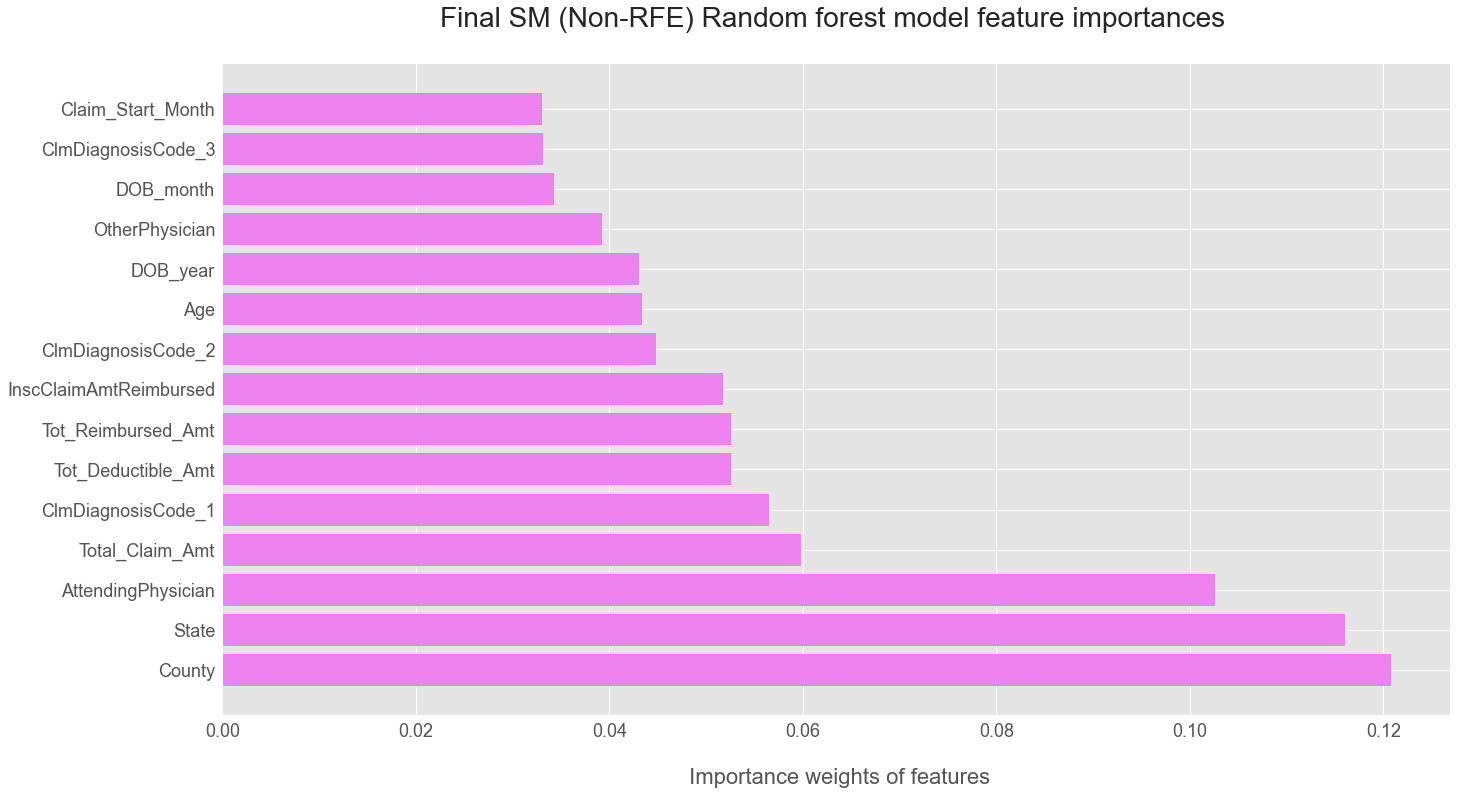

In [58]:
# Creating feature importance table:

feature_imp_df1 = pd.DataFrame(zip(selected_feat1,\
                               abs(fin_rf1.feature_importances_)),
                               columns=["Feature Name", "Weight"])

feature_imp_df1 = feature_imp_df1.sort_values("Weight", ascending=False)\
                  .reset_index(drop=True)

# Looking at top 25 features

top_features1 = feature_imp_df1.head(20)

# Visualizing the results

plt.figure(figsize = (22,12))
plt.barh(top_features1["Feature Name"].head(15), top_features1["Weight"].head(15), color ="violet")
plt.xlabel("\n Importance weights of features", fontsize = 22)
plt.title("Final SM (Non-RFE) Random forest model feature importances \n", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [59]:
# Model using RFE 20 features

selected_feat2 = trainX_BSM.columns[rfe2.support_]

model_results(trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM, fin_rf2, show=True)

The Model Results for  RandomForestClassifier(max_depth=35, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=125, oob_score=True, random_state=42)
************************************************************
Train Accuracy is equal to 0.987
Test Accuracy is equal to 0.760
The Precision score is 0.786
The Average Precision score is 0.704
The Recall score is 0.713
The F1 score is 0.748
The AUC/ROC score is 0.760
True-Positive: 73853.000
True-Negative: 83573.000
False-Positive: 20052.000
False-Negative: 29772.000
Correctly Classified: 157426.000
Incorrectly Classified: 49824.000


[0.9868274122172133,
 0.7595946924004825,
 0.7864650444598265,
 0.7126948130277443]

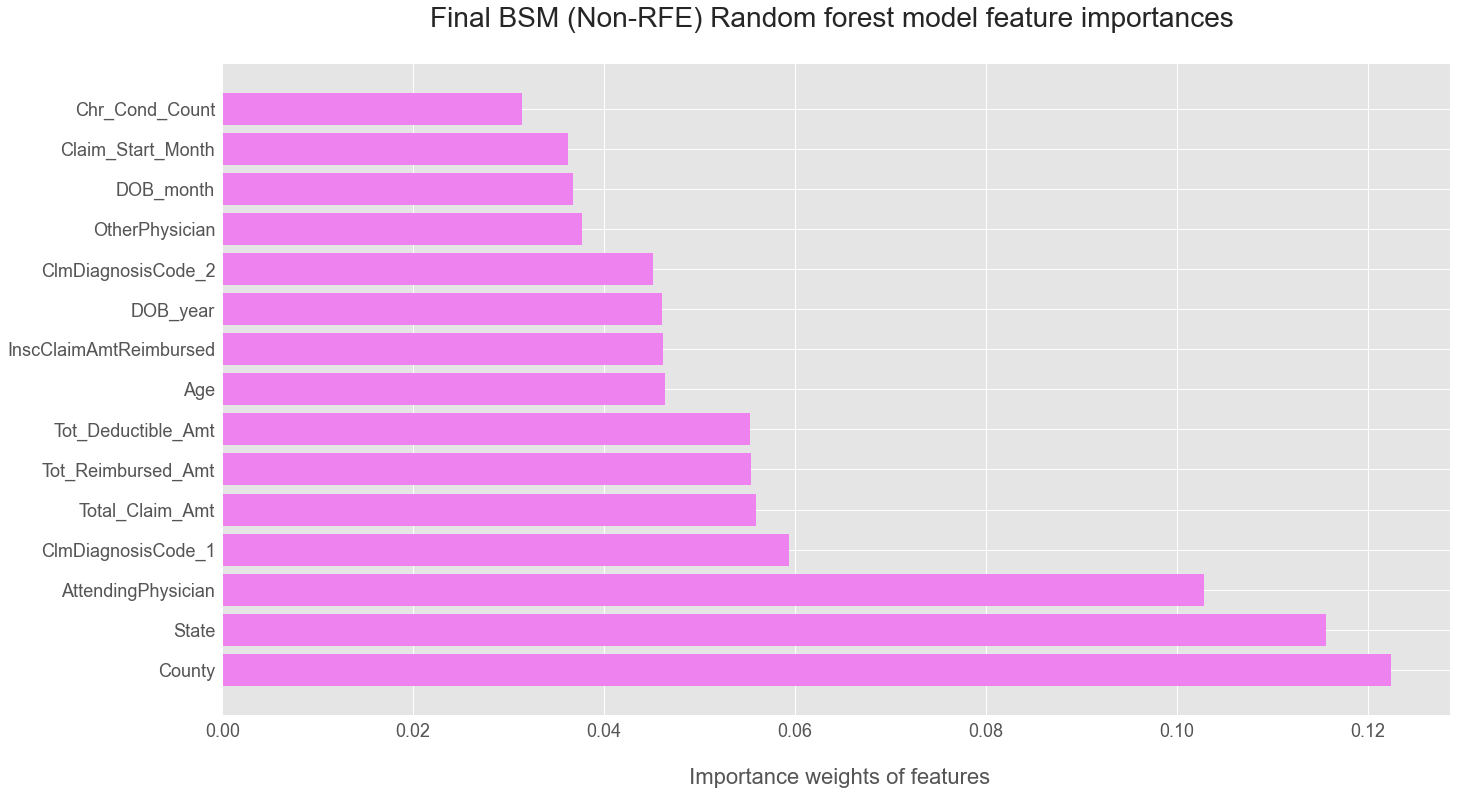

In [60]:
# Creating feature importance table:

feature_imp_df2 = pd.DataFrame(zip(selected_feat2,\
                               abs(fin_rf2.feature_importances_)),
                               columns=["Feature Name", "Weight"])

feature_imp_df2 = feature_imp_df2.sort_values("Weight", ascending=False)\
                  .reset_index(drop=True)

# Looking at top 25 features

top_features2 = feature_imp_df2.head(20)

# Visualizing the results

plt.figure(figsize = (22,12))
plt.barh(top_features2["Feature Name"].head(15), top_features2["Weight"].head(15), color ="violet")
plt.xlabel("\n Importance weights of features", fontsize = 22)
plt.title("Final BSM (Non-RFE) Random forest model feature importances \n", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

### # Visualizing a single tree for both models:

In [61]:
# forest_tree_data1 = tree.export_graphviz(fin_rf1.estimators_[0],
#                      out_file=None, rounded=True, feature_names = selected_feat1, 
#                      filled = True)

# graph1 = gv.Source(forest_tree_data1)
# display(SVG(graph1.pipe(format='svg')))

In [62]:
# forest_tree_data2 = tree.export_graphviz(fin_rf2.estimators_[0],
#                      out_file=None, rounded=True, feature_names = selected_feat2, 
#                      filled = True)

# graph2 = gv.Source(forest_tree_data2)
# display(SVG(graph2.pipe(format='svg')))

### # Full set of evaluation metrics for both models:

- Confusion matrix:

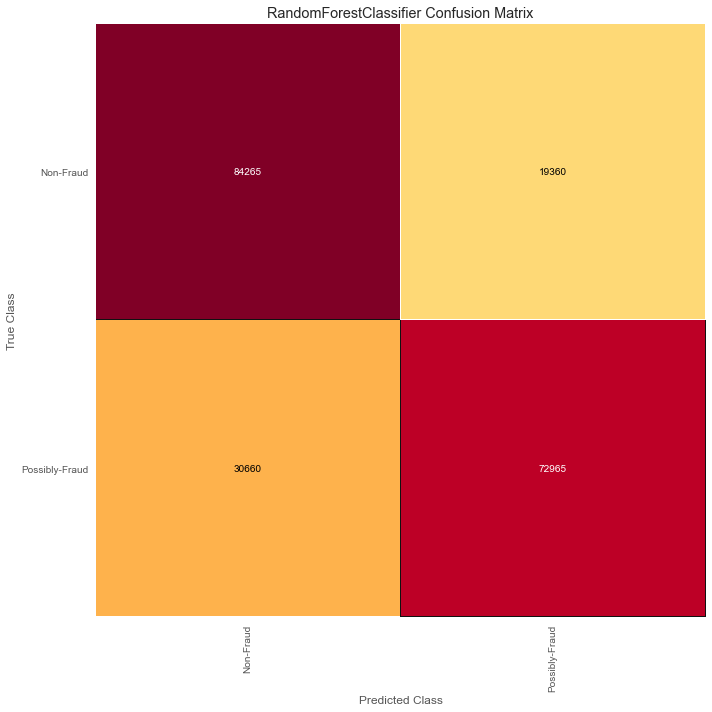

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
visualizer = confusion_matrix(
    fin_rf1,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.show()

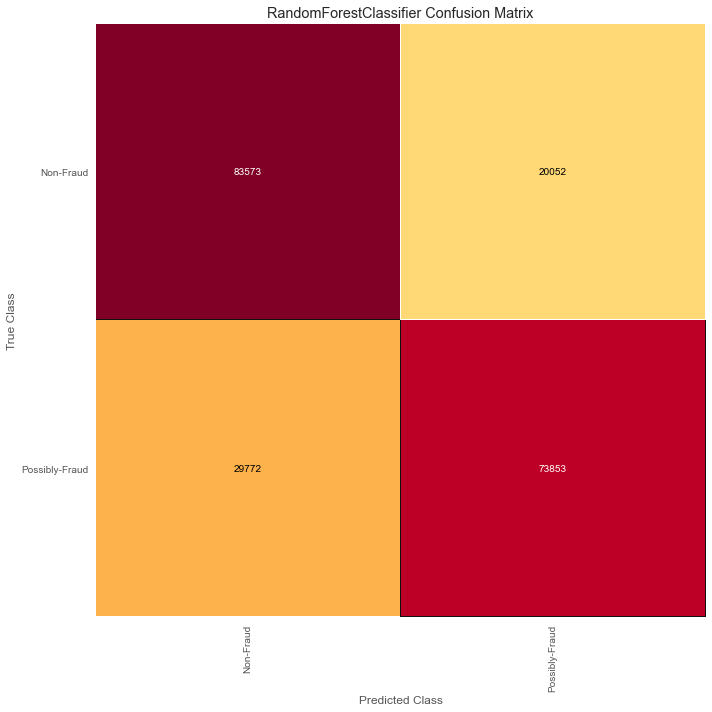

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [67]:
# Visualizing the confusion matrix with Yellowbricks (thres=0.5)

plt.figure(figsize = (10,10))
visualizer = confusion_matrix(
    fin_rf2,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.show()

- AUC/ROC curve

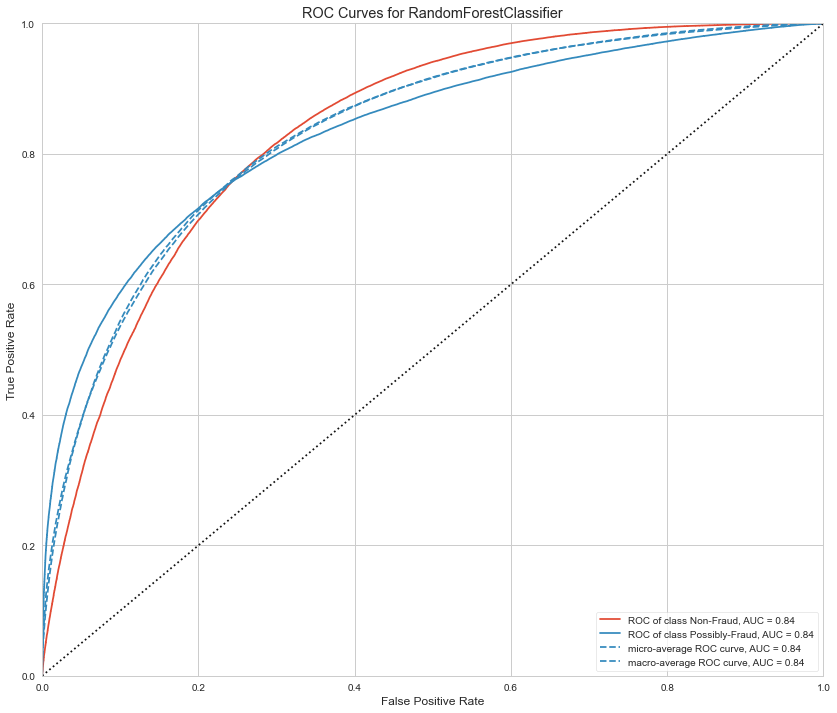

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [68]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")

visualizer = ROCAUC(fin_rf1, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_SM[selected_feat1], trainY_SM)        # Fit the training data to the visualizer
visualizer.score(testX_SM[selected_feat1], testY_SM)        # Evaluate the model on the test data

visualizer.show()

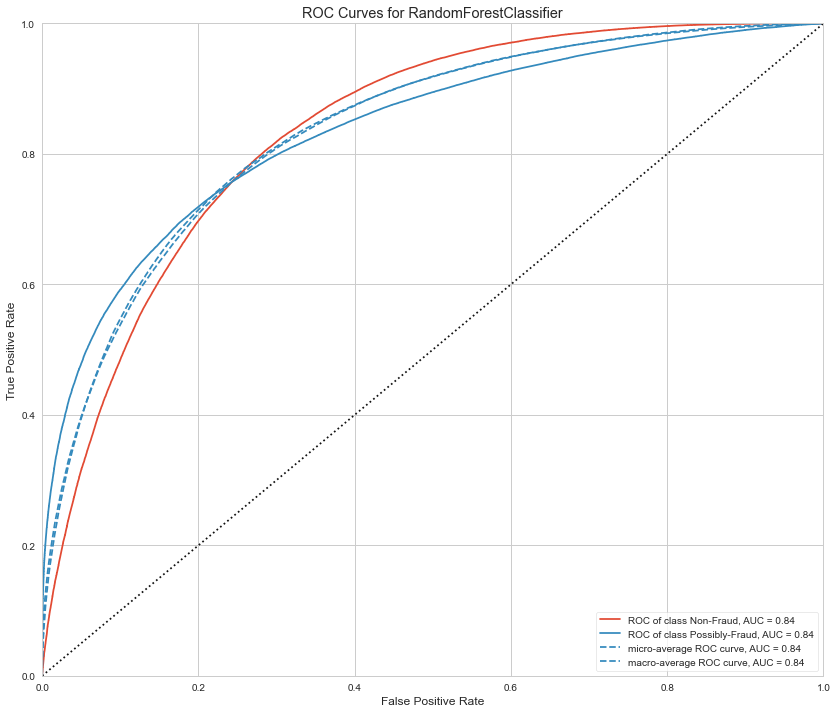

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [69]:
# Visualizing the AUC/ROC curve with Yellowbricks

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")

visualizer = ROCAUC(fin_rf2, classes=['Non-Fraud', 'Possibly-Fraud'])

visualizer.fit(trainX_BSM[selected_feat2], trainY_BSM)        # Fit the training data to the visualizer
visualizer.score(testX_BSM[selected_feat2], testY_BSM)        # Evaluate the model on the test data

visualizer.show()

- Classification report

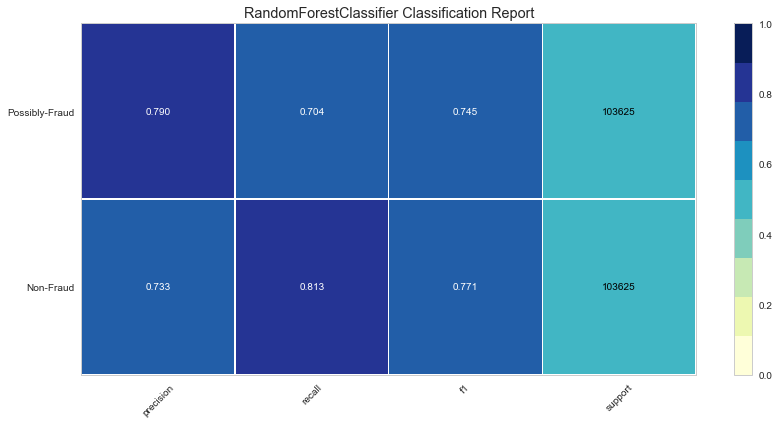

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [70]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    fin_rf1,
    trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

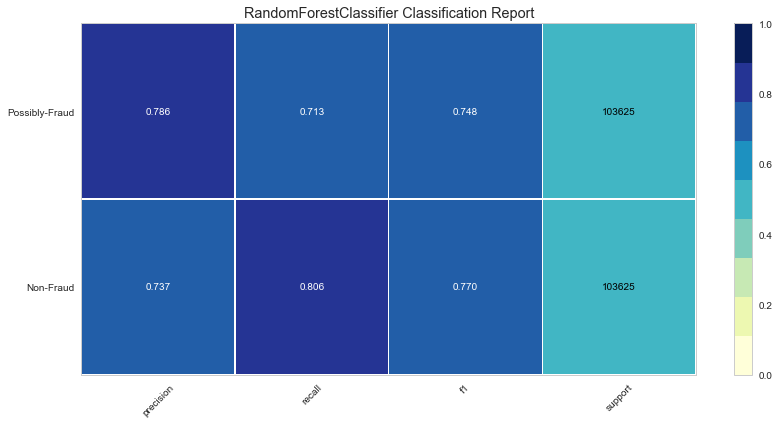

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [71]:
# Visualizing the classification report with Yellowbricks

plt.figure(figsize = (12,6))
sns.set_style("whitegrid")

visualizer = classification_report(
    fin_rf2,
    trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM,
    classes=['Non-Fraud', 'Possibly-Fraud'],
    cmap='YlGnBu',
    support=True)

visualizer.show()

- Precision-recall curve

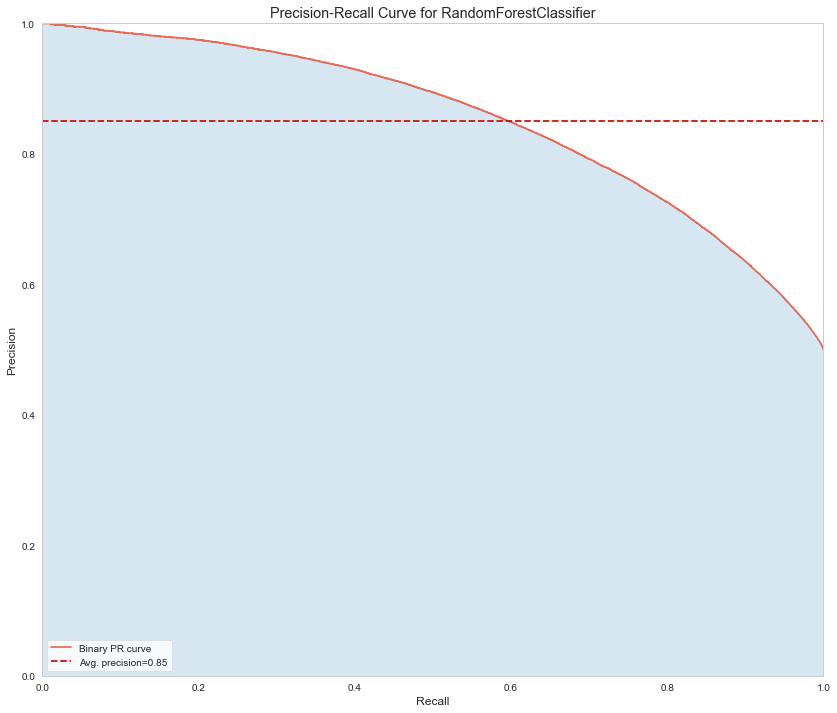

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [72]:
# Visualizing precision-recall curve

from yellowbrick.classifier import precision_recall_curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(fin_rf1, trainX_SM[selected_feat1], trainY_SM, testX_SM[selected_feat1], testY_SM)
viz.show()

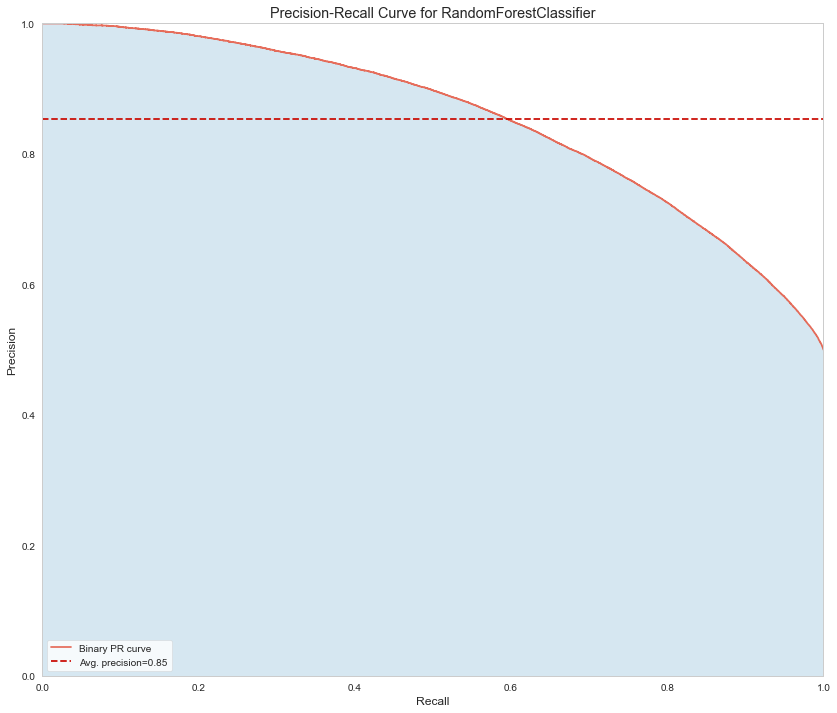

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [73]:
# Visualizing precision-recall curve

from yellowbrick.classifier import precision_recall_curve

plt.figure(figsize = (14,12))
sns.set_style("whitegrid")
viz = precision_recall_curve(fin_rf2, trainX_BSM[selected_feat2], trainY_BSM, testX_BSM[selected_feat2], testY_BSM)
viz.show()

- Prediction error

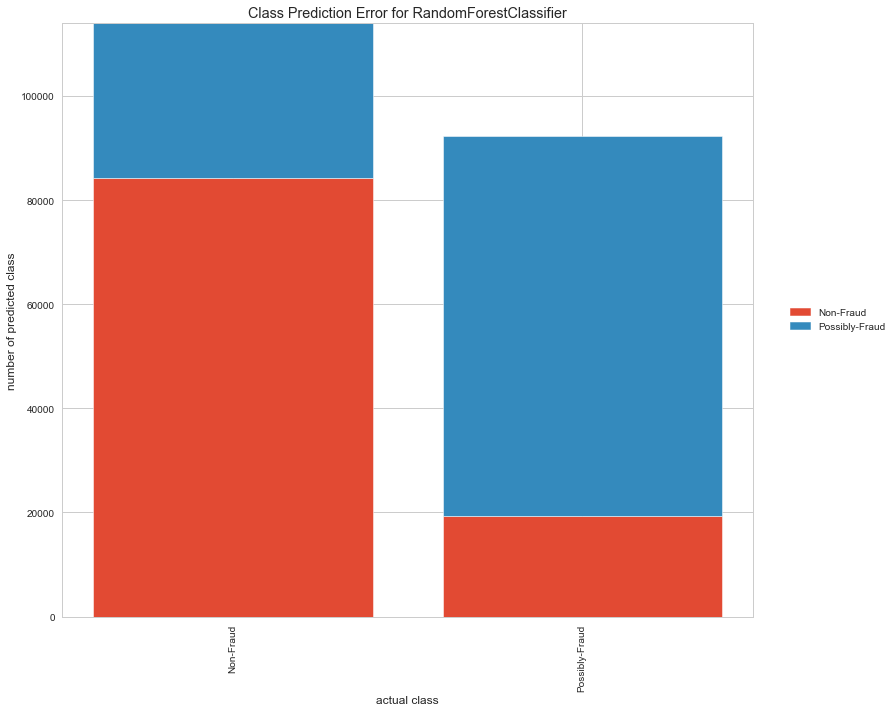

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [74]:
# Visualizing prediction error

from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    fin_rf1,
    trainX_SM[selected_feat1], trainY_SM.values.ravel(),
    testX_SM[selected_feat1], testY_SM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

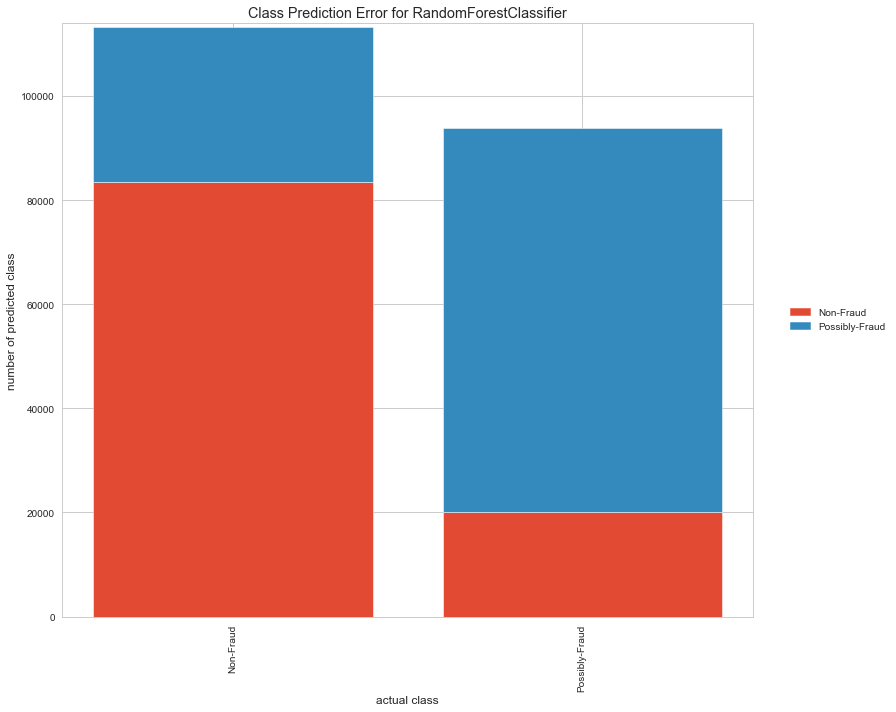

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [75]:
# Visualizing prediction error

from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (14,10))
sns.set_style("whitegrid")
viz = class_prediction_error(
    fin_rf2,
    trainX_BSM[selected_feat2], trainY_BSM.values.ravel(),
    testX_BSM[selected_feat2], testY_BSM.values.ravel(),
    classes=['Non-Fraud', 'Possibly-Fraud'])

viz.show()

### # Threshold selection for both:

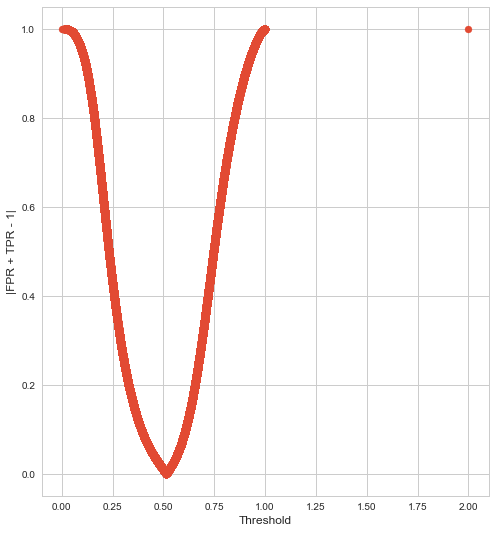

In [76]:
# Visualizing the threshold

from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
fpr1, tpr1, thresholds1 = roc_curve(trainY_SM,fin_rf1.predict_proba(trainX_SM[selected_feat1])[:,1],drop_intermediate=False)

plt.figure(figsize = (8,9))
plt.scatter(thresholds1,np.abs(fpr1+tpr1-1),linewidths=0.3)
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [77]:
thresholds1[np.argmin(np.abs(fpr1+tpr1-1))]

0.5134077187367916

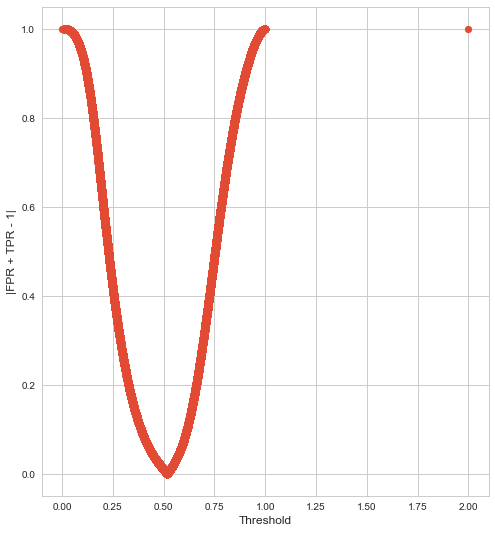

In [78]:
# Visualizing the threshold

sns.set_style("whitegrid")
fpr2, tpr2, thresholds2 = roc_curve(trainY_BSM,fin_rf2.predict_proba(trainX_BSM[selected_feat2])[:,1],drop_intermediate=False)

plt.figure(figsize = (8,9))
plt.scatter(thresholds2,np.abs(fpr2+tpr2-1),linewidths=0.3)
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [79]:
thresholds2[np.argmin(np.abs(fpr2+tpr2-1))]

0.5162350945857795

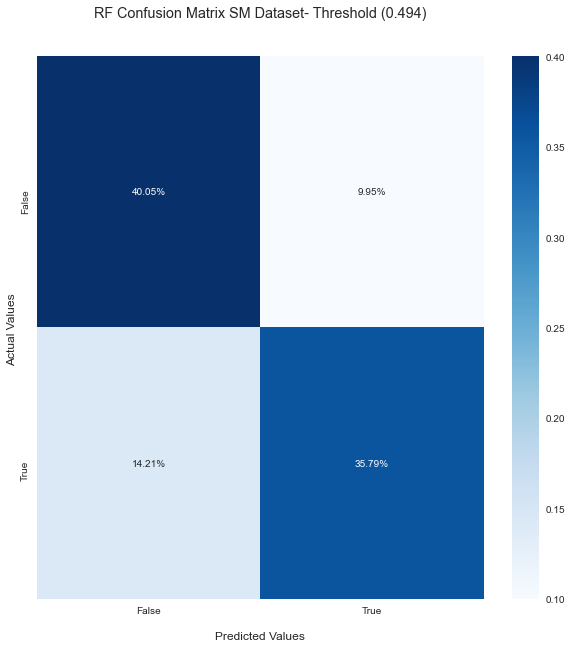

In [80]:
# Looking at confusion matrix (thres=0.494)

cm1 = get_confusion_matrix(fin_rf1, testX_SM[selected_feat1], testY_SM, thres=0.494)

#Plotting the confusion matrix

labels = ['Non-Fraud', 'Possibly-Fraud']

plt.figure(figsize = (10,10))

ax = sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('RF Confusion Matrix SM Dataset- Threshold (0.494)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

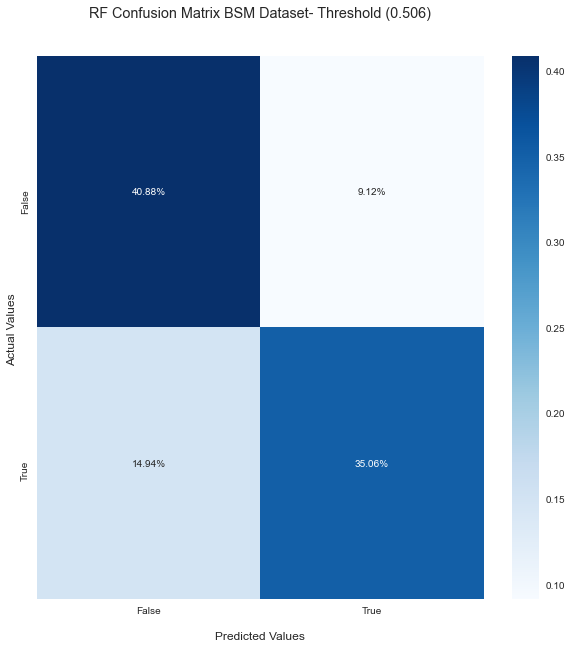

In [81]:
# Looking at confusion matrix (thres=0.506)

cm2 = get_confusion_matrix(fin_rf2, testX_BSM[selected_feat2], testY_BSM, thres=0.506)

#Plotting the confusion matrix

labels = ['Non-Fraud', 'Possibly-Fraud']

plt.figure(figsize = (10,10))

ax = sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('RF Confusion Matrix BSM Dataset- Threshold (0.506)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## SHAP Feature Importance Visualization:

### # Waterfall plot:

In [ ]:
import shap
sns.set_style("whitegrid")

# SM

# Explain the model's predictions using SHAP

SMexplainer = shap.TreeExplainer(fin_rf1, feature_perturbation='tree_path_dependent')
SMshap_values = SMexplainer(trainX_SM[selected_feat1])

# visualize the first prediction's explanation
shap.plots.waterfall(SMshap_values[0])

In [ ]:
# BSM

# Explain the model's predictions using SHAP

BSMexplainer = shap.TreeExplainer(fin_rf2, feature_perturbation='tree_path_dependent')
BSMshap_values = BSMexplainer(trainX_BSM[selected_feat2])

# visualize the first prediction's explanation
shap.plots.waterfall(BSMshap_values[0])

### # Force Plot

In [ ]:
# SM

# visualize the first prediction's explanation with a force plot
shap.plots.force(SMshap_values[0])

In [ ]:
# BSM

# visualize the first prediction's explanation with a force plot
shap.plots.force(BSMshap_values[0])

In [ ]:
# SM

# visualize all the training set predictions
shap.plots.force(SMshap_values)

In [ ]:
# BSM

# visualize all the training set predictions
shap.plots.force(BSMshap_values)

### # Beeswarm Plot

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(SMshap_values)

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(BSMshap_values)

### # Bar Plot

In [ ]:
# summarize the effects of all the features
shap.plots.bar(SMshap_values)

In [ ]:
# summarize the effects of all the features
shap.plots.bar(BSMshap_values)